# Blood donor

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('HepatitisCdata.csv')

## EDA

In [3]:
data

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [4]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
data.isna().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [6]:
data=data.dropna()
data.shape

(589, 13)

In [7]:
data.replace(to_replace=['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'],
             value=['0','1','2','3','4'],inplace=True)

In [8]:
data.drop(['Age', 'Sex'], axis='columns', inplace=True)

In [9]:
data

,Category,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...
608,4,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6
609,4,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5
610,4,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,4,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3


<AxesSubplot:>

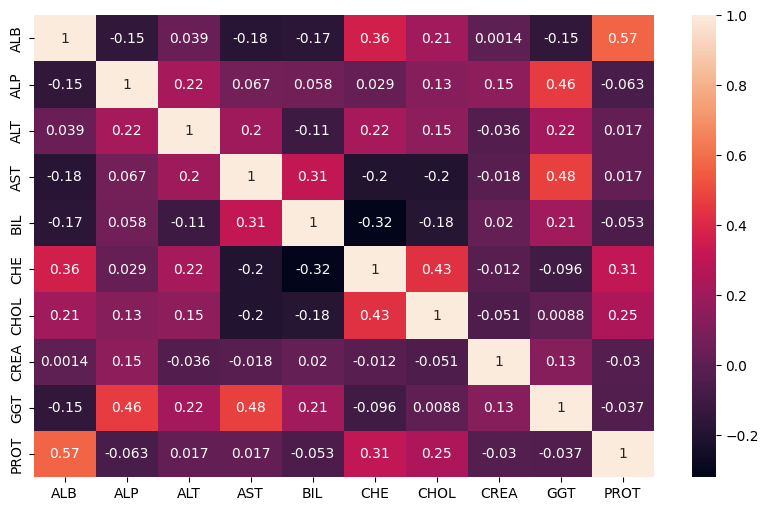

In [10]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True)

### From the previous heatmap we can observe that there are no variables strongly correlated. ALB and PROT  are stronger correlated than others.

In [11]:
data.groupby('Category').Category.count()

Category
0    526
1      7
2     20
3     12
4     24
Name: Category, dtype: int64

<AxesSubplot:ylabel='Category'>

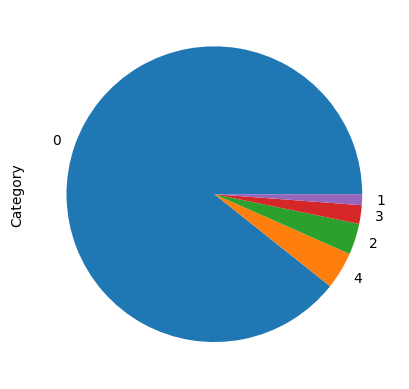

In [12]:
plt.figure()
data.Category.value_counts().plot(kind='pie')

### We can observe that our data is imbalanced. So it's necessary to deal with this type of problem. I'm going to upsample

In [13]:
cat0_df  = data[data["Category"] == "0"]
cat1_df  = data[data["Category"] == "1"]
cat2_df  = data[data["Category"] == "2"]
cat3_df  = data[data["Category"] == "3"]
cat4_df  = data[data["Category"] == "4"]

cat1 = resample(cat1_df,
             replace=True,
             n_samples=len(cat0_df),
             random_state=42)
cat2 = resample(cat2_df,
             replace=True,
             n_samples=len(cat0_df),
             random_state=42)
cat3 = resample(cat3_df,
             replace=True,
             n_samples=len(cat0_df),
             random_state=42)
cat4 = resample(cat4_df,
             replace=True,
             n_samples=len(cat0_df),
             random_state=42)
print(cat1.shape, cat2.shape, cat3.shape, cat4.shape)

(526, 11) (526, 11) (526, 11) (526, 11)


In [14]:
data_upsampled = pd.concat([data, cat1, cat2, cat3, cat4])
data_upsampled.shape

(2693, 11)

<AxesSubplot:ylabel='Category'>

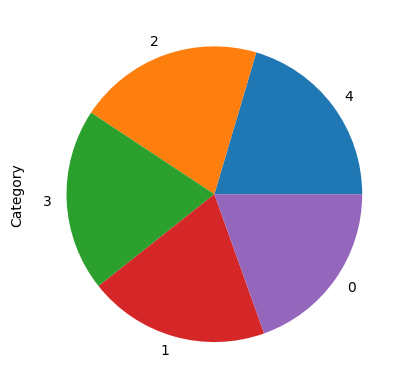

In [15]:
plt.figure()
data_upsampled.Category.value_counts().plot(kind='pie')

## Split the data into train and test

In [16]:
x=data.drop(columns=['Category'] ,axis=1)
y=data['Category']

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, stratify=y,random_state=2) 
#stratify ensures that the test and train splits have the same ratio of class ratio for training classification models.

In [18]:
model= LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [19]:
y_pred= model.predict(x_test)
training_data_accuracy=accuracy_score(y_test,y_pred)
print('Accuracy on training data',training_data_accuracy)

Accuracy on training data 0.9152542372881356


## Use GridSearch

In [20]:
# parameter grid
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [21]:
logreg = LogisticRegression()
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds

In [22]:
clf.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [23]:
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'C': 1000.0, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy : 0.957491134751773


In [24]:
lr = LogisticRegression(C = 0.01, penalty = 'l2', solver = 'newton-cg')
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [26]:
# Saving the model
import joblib
 
joblib.dump(lr, "lr_model.sav")

['lr_model.sav']